In [85]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


## Installing necessary libraries

In [86]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('ggplot')



### We are going to apply the approach of Sentimental Analysis on IMBD dataset to analyze different texts to determine whether a particular text displays a positive or negative sentiment

As we can see that texts consist of punctuations and upper case letters, thereby cleaning of text will take place by removing punctuations etc.

In [87]:
df.head()

,review,sentiment,neg,neu,pos,compound
0,one of the other reviewers has mentioned that ...,1,0.196,0.748,0.056,-0.9947
1,a wonderful little production br br the filmin...,1,0.052,0.765,0.182,0.9693
2,i thought this was a wonderful way to spend ti...,1,0.106,0.666,0.227,0.9712
3,basically theres a family where a little boy j...,0,0.134,0.785,0.081,-0.8858
4,petter matteis love in the time of money is a ...,1,0.052,0.801,0.147,0.9744


In [88]:
df.shape

(50000, 6)

In [89]:
import string

# define a function to remove punctuation
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

# convert text to lower case and remove punctuation
df['review'] = df['review'].apply(lambda x: remove_punctuation(x.lower()))

Now you can see that review column which is of our interest has been cleaned by **remove_punctuation function**

In [90]:
df.head()

,review,sentiment,neg,neu,pos,compound
0,one of the other reviewers has mentioned that ...,1,0.196,0.748,0.056,-0.9947
1,a wonderful little production br br the filmin...,1,0.052,0.765,0.182,0.9693
2,i thought this was a wonderful way to spend ti...,1,0.106,0.666,0.227,0.9712
3,basically theres a family where a little boy j...,0,0.134,0.785,0.081,-0.8858
4,petter matteis love in the time of money is a ...,1,0.052,0.801,0.147,0.9744


In [91]:
df.isnull().sum()

review       0
sentiment    0
neg          0
neu          0
pos          0
compound     0
dtype: int64

Here we have replace 1 with yes and 0 with no sentiments

In [92]:
df['sentiment']=df['sentiment'].replace({'positive':1,"negative":0})  

In [93]:
df.head()

,review,sentiment,neg,neu,pos,compound
0,one of the other reviewers has mentioned that ...,1,0.196,0.748,0.056,-0.9947
1,a wonderful little production br br the filmin...,1,0.052,0.765,0.182,0.9693
2,i thought this was a wonderful way to spend ti...,1,0.106,0.666,0.227,0.9712
3,basically theres a family where a little boy j...,0,0.134,0.785,0.081,-0.8858
4,petter matteis love in the time of money is a ...,1,0.052,0.801,0.147,0.9744


In [94]:
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In the dataframe, sentiments both positive and negative are 50, 50 percent distributed

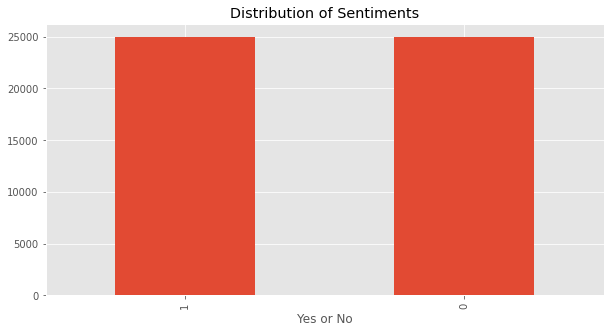

In [95]:
ax=df['sentiment'].value_counts().plot(kind='bar',title='Distribution of Sentiments',figsize=(10, 5))
ax.set_xlabel('Yes or No')
plt.show()

Now lets use WordCloud to observe the frequency of a particular word in particular text/review.
The more frequent a word is, the BIGGER and bolder it will appear on the word cloud.

In [96]:
ex=df['review'][0]
ex

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare fo

In [97]:
cloud_two_cities = WordCloud().generate(ex)

As you can see, the violence word is much bolder and higher in size, and it also comprehends to **negative sentiment**

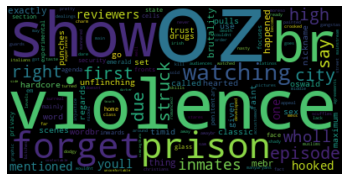

In [98]:
plt.imshow(cloud_two_cities, interpolation='bilinear')
plt.axis('off')
plt.show()

We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:
* Stop words are removed
* each word is scored and combined to a total score.

In [99]:
from tqdm.notebook import tqdm

In [100]:
sa = SentimentIntensityAnalyzer()

This is an example where you can see positive value is **0.6+** which manifests as a **positive sentiment**

In [101]:
sa.polarity_scores('i am so good')

{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4927}

In [102]:
# Run the polarity score on the entire dataset
result = []
for i, row in tqdm(df.iterrows(), total=len(df)):
    review = row['review']
    result.append(sa.polarity_scores(review))

  0%|          | 0/50000 [00:00<?, ?it/s]

Sentimental scores of first four texts

In [103]:
result[1:5]

[{'neg': 0.052, 'neu': 0.765, 'pos': 0.182, 'compound': 0.9693},
 {'neg': 0.106, 'neu': 0.666, 'pos': 0.227, 'compound': 0.9712},
 {'neg': 0.134, 'neu': 0.785, 'pos': 0.081, 'compound': -0.8858},
 {'neg': 0.052, 'neu': 0.801, 'pos': 0.147, 'compound': 0.9744}]

In [104]:
df2 = pd.DataFrame(result)
df2.head()


,neg,neu,pos,compound
0,0.196,0.748,0.056,-0.9947
1,0.052,0.765,0.182,0.9693
2,0.106,0.666,0.227,0.9712
3,0.134,0.785,0.081,-0.8858
4,0.052,0.801,0.147,0.9744


In [105]:

df=pd.concat([df,df2],axis=1)

As you can see, we have determined setimental scores reviews
Compound column score indicates that how it is distributed from negative to positive

In [115]:
df3=df.copy()

In [106]:
df.head()

,review,sentiment,neg,neu,pos,compound,neg,neu,pos,compound
0,one of the other reviewers has mentioned that ...,1,0.196,0.748,0.056,-0.9947,0.196,0.748,0.056,-0.9947
1,a wonderful little production br br the filmin...,1,0.052,0.765,0.182,0.9693,0.052,0.765,0.182,0.9693
2,i thought this was a wonderful way to spend ti...,1,0.106,0.666,0.227,0.9712,0.106,0.666,0.227,0.9712
3,basically theres a family where a little boy j...,0,0.134,0.785,0.081,-0.8858,0.134,0.785,0.081,-0.8858
4,petter matteis love in the time of money is a ...,1,0.052,0.801,0.147,0.9744,0.052,0.801,0.147,0.9744


So the above was VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach through which we analyzed in terms of sentimental emotions of **IMDB reviews**.
There is second appreach we will be using that is utilization of transfer learning, where we will use **Roberta Pretrained Model** from  **Huggingface** Pipeline

This approach is automatic access of transfer learning model

In [107]:
from transformers import pipeline
pipe = pipeline("sentiment-analysis")

In [108]:
pipe('I love flowers!') # label : positive and score is also given , amazing haa!

[{'label': 'POSITIVE', 'score': 0.9998720288276672}]

In [110]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [111]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [112]:
example='I love flowers'

This is how we can measure sentimental score throgh roberta model

In [113]:
tokenizer(example, return_tensors='pt')

{'input_ids': tensor([[   0,  100,  657, 7716,    2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1]])}

In [114]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0028053927, 'roberta_neu': 0.018429562, 'roberta_pos': 0.97876513}
